In [1]:
#importing the necessary libraries
import pandas as pd #load and manipulate data
import matplotlib.pyplot as plt #to draw graphs
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw a classification tree
from sklearn.model_selection import train_test_split #split data into training and testing sets
from sklearn.metrics import accuracy_score #to find out the accuracy


print('All modules have been imported')

All modules have been imported


In [2]:
#df = pd.read_csv('1000samples.csv') #use the same jupyter notebook to play around with the 1000 samples
#reading the >1 million sample dataset
df = pd.read_csv('instacart_adj_class.csv')
#looking at the 12 rows of the dataset for which we performed gini calculations
df.head(12)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,weekday,before noon,2,Bulgarian Yogurt,120,16,yogurt,fresh food
1,1,11109,2,1,112108,train,4,weekday,before noon,2,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,fresh food
2,1,10246,3,0,112108,train,4,weekday,before noon,2,Organic Celery Hearts,83,4,fresh vegetables,fresh food
3,1,49683,4,0,112108,train,4,weekday,before noon,2,Cucumber Kirby,83,4,fresh vegetables,fresh food
4,1,43633,5,1,112108,train,4,weekday,before noon,2,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,processed food
5,1,13176,6,0,112108,train,4,weekday,before noon,2,Bag of Organic Bananas,24,4,fresh fruits,fresh food
6,1,47209,7,0,112108,train,4,weekday,before noon,2,Organic Hass Avocado,24,4,fresh fruits,fresh food
7,1,22035,8,1,112108,train,4,weekday,before noon,2,Organic Whole String Cheese,21,16,packaged cheese,fresh food
8,36,39612,1,0,79431,train,23,weekend,after noon,2+,Grated Pecorino Romano Cheese,2,16,specialty cheeses,fresh food
9,36,19660,2,1,79431,train,23,weekend,after noon,2+,Spring Water,115,7,water seltzer sparkling water,processed food


In [4]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [5]:
df.drop(['order_id', 'product_id', 'add_to_cart_order','user_id',
       'eval_set', 'order_number','product_name', 'aisle_id', 'department_id',
       'aisle',], axis = 1, inplace = True) #dropping columns not needed

In [6]:
df.head(10)

,reordered,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,weekday,before noon,2,fresh food
1,1,weekday,before noon,2,fresh food
2,0,weekday,before noon,2,fresh food
3,0,weekday,before noon,2,fresh food
4,1,weekday,before noon,2,processed food
5,0,weekday,before noon,2,fresh food
6,0,weekday,before noon,2,fresh food
7,1,weekday,before noon,2,fresh food
8,0,weekend,after noon,2+,fresh food
9,1,weekend,after noon,2+,processed food


In [9]:
new_columns = ['department','order_dow','order_hour_of_day','days_since_prior_order','reordered']
df = df[new_columns]
df.head() #rearranging the columns

,department,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,fresh food,weekday,before noon,2,1
1,fresh food,weekday,before noon,2,1
2,fresh food,weekday,before noon,2,0
3,fresh food,weekday,before noon,2,0
4,processed food,weekday,before noon,2,1


In [10]:
#changing the names of the columns
df.columns = ['department', 'day of week', 'hour of day', 'Weeks prior order', 'reorder']

In [7]:
#looking at updated changes
df.head(12)

,department,day of week,hour of day,Weeks prior order,reorder
0,fresh food,weekend,after noon,2+,0
1,fresh food,weekend,after noon,2+,1
2,fresh food,weekday,before noon,2,1
3,fresh food,weekday,before noon,2,1
4,fresh food,weekday,before noon,2,1
5,processed food,weekday,before noon,2,1
6,processed food,weekday,before noon,2,1
7,processed food,weekday,before noon,2,1
8,processed food,weekday,before noon,2,1
9,processed food,weekday,before noon,2,1


In [11]:
print('Normally, the next step is to go through the missing data, our sample dataset does not have any missing data')
print('Since scikit learn does not support rows with missing values, we need to take care of those rows')

Normally, the next step is to go through the missing data, our sample dataset does not have any missing data
Since scikit learn does not support rows with missing values, we need to take care of those rows


In [12]:
#Format data: step 1: split the data into dependent and independent variables
#conventional notation: X(capital X) to represent the data we will use to make the classification and y(lower case y) to represent the thing that we will predict. Our prediction will be the reorder

#Making a copy of X:
X = df.drop('reorder', axis=1).copy()
X.head(12) #verify that the reorder column has been dropped

,department,day of week,hour of day,Weeks prior order
0,fresh food,weekday,before noon,2
1,fresh food,weekday,before noon,2
2,fresh food,weekday,before noon,2
3,fresh food,weekday,before noon,2
4,processed food,weekday,before noon,2
5,fresh food,weekday,before noon,2
6,fresh food,weekday,before noon,2
7,fresh food,weekday,before noon,2
8,fresh food,weekend,after noon,2+
9,processed food,weekend,after noon,2+


In [13]:
#Making a copy of y:
y = df['reorder'].copy()
y.head(12) #verify that y contains our prediction column

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     1
10    0
11    1
Name: reorder, dtype: int64

In [14]:
#Format data: step 2: One-hot coding: scikit learn can only work through floats. 
#We will take a look at the datatypes of X

X.dtypes #all are objects, will need to convert to float
#also scikit learn not not support categorical data such as 3 different categories: will need to convert to multiple binary columns

#Why important? if categorical data was treated like a continuous data, the decision tree will start combining categories such as misc. with fresh foods which is not true or misc. with processed food which is also not true

#In our case we have department with 3 categories, and weeks prior order with 3 categories

#2 challenges:
#convert objects to float
#convert categorical data to multiple binary data

department           object
day of week          object
hour of day          object
Weeks prior order    object
dtype: object

In [15]:
#we will now inspect the unique values of our categorical data
X['department'].unique() #will need to convert into a series of columsn with 0's and 1's

array(['fresh food', 'processed food', 'miscellaneaous'], dtype=object)

In [16]:
#we will use the get_dummies to do the one-hot coding
pd.get_dummies(X, columns=['department']).head() #to see what happens to the department column

,day of week,hour of day,Weeks prior order,department_fresh food,department_miscellaneaous,department_processed food
0,weekday,before noon,2,1,0,0
1,weekday,before noon,2,1,0,0
2,weekday,before noon,2,1,0,0
3,weekday,before noon,2,1,0,0
4,weekday,before noon,2,0,0,1


In [17]:
#now that we know, how encoding works, we shall test it out on the other features as well

pd.get_dummies(X, columns=['department', 'day of week', 'hour of day', 'Weeks prior order']).head()

,department_fresh food,department_miscellaneaous,department_processed food,day of week_weekday,day of week_weekend,hour of day_after noon,hour of day_before noon,Weeks prior order_1,Weeks prior order_2,Weeks prior order_2+
0,1,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0,1,0
4,0,0,1,1,0,0,1,0,1,0


In [18]:
#from above we can see that all the features have been encoded
#we will now put it into a new variable and observe the data type

X_encoded = pd.get_dummies(X, columns=['department', 'day of week', 'hour of day', 'Weeks prior order'])

X_encoded.head()

,department_fresh food,department_miscellaneaous,department_processed food,day of week_weekday,day of week_weekend,hour of day_after noon,hour of day_before noon,Weeks prior order_1,Weeks prior order_2,Weeks prior order_2+
0,1,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0,1,0
4,0,0,1,1,0,0,1,0,1,0


In [19]:
X_encoded.dtypes

department_fresh food        uint8
department_miscellaneaous    uint8
department_processed food    uint8
day of week_weekday          uint8
day of week_weekend          uint8
hour of day_after noon       uint8
hour of day_before noon      uint8
Weeks prior order_1          uint8
Weeks prior order_2          uint8
Weeks prior order_2+         uint8
dtype: object

In [20]:
#Recall our previous two challenges: taking care of objects and categorical data
#One-hot coding has taken care of this step and helped us.

In [21]:
#Prediction column
y.unique()

#the prediction column is already sorted. So we are good and next move to the classification tree

array([1, 0])

In [22]:
print('Classification Tree: we shall split the data into training and testing sets')

Classification Tree: we shall split the data into training and testing sets


In [23]:
#split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state = 50)
#note about random state: used for intializing internal random number generator that decides on splitting the training and testing data. Random number provided ensures the same random numbers are generated in the same order that many times

In [26]:
#create a decision tree and we will fit it into the training data
clf_dt = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=50)
#max leaf nodes: grows a tree in best fashion first, defines the best nodes and reduces the impurity, not show up the unnecessary leaf nodes
clf_dt = clf_dt.fit(X_train, y_train)

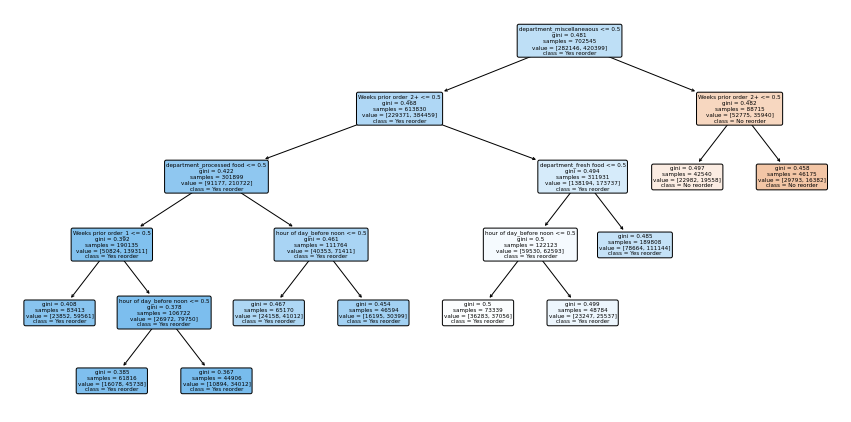

In [27]:
#We will plot the tree to see how does it look
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled = True, rounded=True, class_names=['No reorder', 'Yes reorder'],feature_names=X_encoded.columns)

plt.savefig('decision_tree_sample_1millionsamples.jpg')
plt.show()

In [28]:
#now let us see how it performs on the testing dataset by running the testing dataset down the tree and predicting values on a test set
y_predicted = clf_dt.predict(X_test)

#checking the accuracy score
#how accurate is the prediction
accuracy_score(y_test, y_predicted) * 100

62.2084790336098

In [29]:
#This part onwards is out of scope for our project of 1 week:
#can be added to the limitations of our study since we are only focussing on decision trees:
#One thing that may be causing errors for the dataset is that it may have overfit the training dataset: Pruning can solve the problem

#overfit: memorizing the answers of the exam
#pruning: similar to thinking about the questions

#also: the training and testing datasets were created from the 12 samples that were presented
#that's why not identical to our tree but surely does have those elements
